In [13]:
import os, glob, math
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import kagglehub

In [2]:
import kagglehub, os, glob

# Download dataset
path = kagglehub.dataset_download("vinayshanbhag/bird-song-data-set")
print("Dataset downloaded at:", path)


100%|██████████| 2.09G/2.09G [33:49<00:00, 1.11MB/s] 

Extracting files...


Dataset downloaded at: C:\Users\21268\.cache\kagglehub\datasets\vinayshanbhag\bird-song-data-set\versions\1


In [19]:
# 2) Find an audio file (.wav preferred)
audio_files = []
for ext in ("*.wav", "*.ogg"):
    audio_files += glob.glob(os.path.join(path, "**", ext), recursive=True)

if not audio_files:
    raise FileNotFoundError("No audio files found in the dataset.")
audio_path = audio_files[0]
print("Using audio file:", audio_path)


Using audio file: C:\Users\21268\.cache\kagglehub\datasets\vinayshanbhag\bird-song-data-set\versions\1\wavfiles\101308-0.wav


In [9]:
# 3) Load with librosa (keep native sample rate)
y, sr = librosa.load(audio_path, sr=None, mono=True)
n_samples = y.size
duration = n_samples / sr
print(f"Sample rate: {sr} Hz  |  Samples: {n_samples}  |  Duration: {duration:.2f}s")


Sample rate: 22050 Hz  |  Samples: 66150  |  Duration: 3.00s


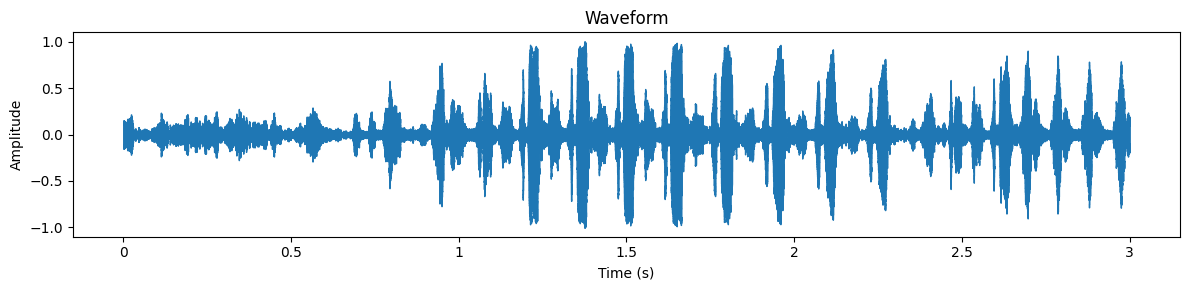

In [10]:
# 4) Plot waveform
plt.figure(figsize=(12, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


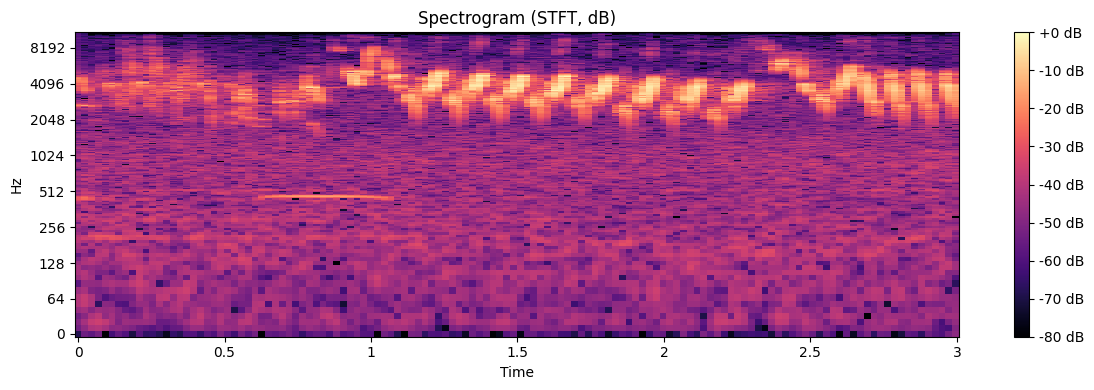

In [11]:
# 5) Spectrogram (STFT, in dB)
n_fft = 2048
hop = 512
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop))
S_db = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_db, sr=sr, hop_length=hop, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (STFT, dB)")
plt.tight_layout()
plt.show()

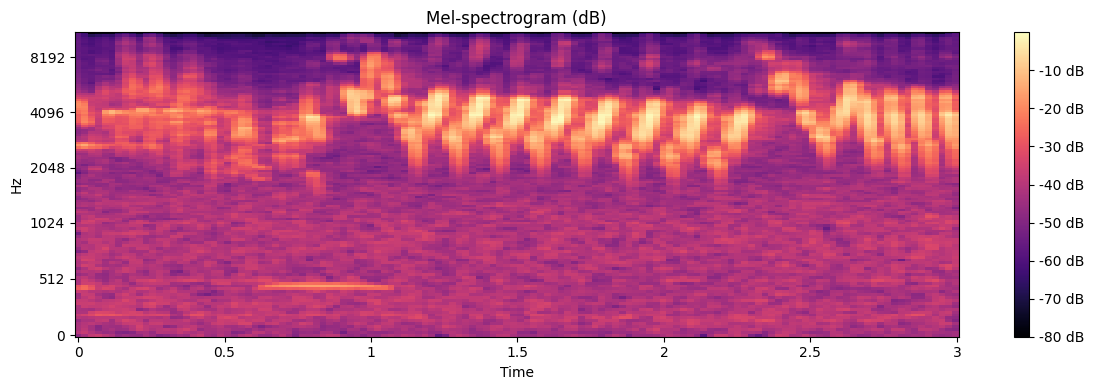

In [20]:

# Mel-spectrogram
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop, n_mels=128)
mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_db, sr=sr, hop_length=hop, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-spectrogram (dB)")
plt.tight_layout()
plt.show()


In [21]:
# 6) Play audio
display(Audio(y, rate=sr))